<h1>Análise univariada das variáveis de interesse</h1>

In [1]:
# Bibliotecas para o estudo
import pandas as pd # estrutura de dados
import matplotlib.pyplot as plt # análise por gráficos
import seaborn as sns # análise por gráficos

## Variável COR/RACA

In [2]:
path = '../datasets/microdados_enem_2017/DADOS/MICRODADOS_ENEM_2017.csv'
df = pd.read_csv(
    path,                   # caminho do arquivo a ser lido 
    encoding='iso-8859-1',  # codificação dos caracteres 
    sep=';',                # separador de colunas
    usecols=['TP_COR_RACA','NU_NOTA_MT'] # IMPORTANTE: ler só a coluna TP_COR_RACA
)
df.info() # uso de memória 51.4 MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6731278 entries, 0 to 6731277
Data columns (total 2 columns):
 #   Column       Dtype  
---  ------       -----  
 0   TP_COR_RACA  int64  
 1   NU_NOTA_MT   float64
dtypes: float64(1), int64(1)
memory usage: 102.7 MB


In [3]:
df['TP_COR_RACA'] = df['TP_COR_RACA'].map({
    0: "Não declarado",
    1: "Branca",
    2: "Preta",
    3: "Parda",
    4: "Amarela",
    5: "Indígena",
})

In [9]:
import numpy as np

# desvio padrão
def std(x): 
    return np.std(x)

In [18]:
df_temp = df.groupby(by=["TP_COR_RACA"])['NU_NOTA_MT'].agg([std, 'mean'])
df_temp = df_temp.reset_index()
df_temp

,TP_COR_RACA,std,mean
0,Amarela,109.996943,521.620756
1,Branca,113.031564,546.271039
2,Indígena,84.710945,480.012989
3,Não declarado,117.113133,539.053409
4,Parda,96.280277,502.943107
5,Preta,90.248989,495.029013


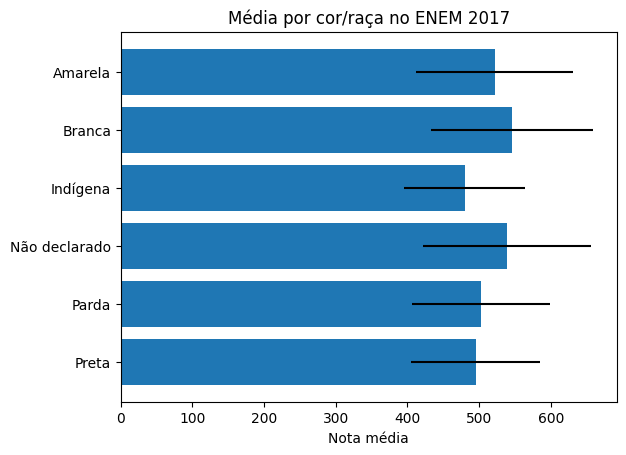

In [19]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcdefaults()
fig, ax = plt.subplots()

# Example data
cor_raca = df_temp['TP_COR_RACA']
y_pos = np.arange(len(cor_raca))
nota_media = df_temp['mean']
nota_desvio_padrao = df_temp['std']

ax.barh(y_pos, nota_media, xerr=nota_desvio_padrao, align='center')
ax.set_yticks(y_pos, labels=cor_raca)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Nota média')
ax.set_title('Média por cor/raça no ENEM 2017')

plt.show()